<a href="https://colab.research.google.com/github/ahmedfouadlagha/TP_MachineLearning/blob/main/TP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP (Linear / non-Linear Modelling)

les bibliothèques nécessaires pour effectuer des calculs mathématiques, générer des tracés graphiques et utiliser des fonctions aléatoires.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

#Exercise 01:
Write a program that can find w0 and w1 for an arbitrary dataset of xn; tn pairs

In [ ]:
def generate_dataset(n):
    xn = []
    tn = []
    for i in range(n):
        xn.append(random.randint(1928, 2008))
        tn.append(math.sin(2*math.pi*xn[i]) + random.gauss(0, 0.3))
        print("x{} = {}, t{} = {}".format(i+1,xn[i],i+1,tn[i]))
    return xn,tn

def find_w0_w1(xn, tn):
    xn = np.array(xn)
    tn = np.array(tn)
    xn_mean = np.mean(xn)
    tn_mean = np.mean(tn)
    xn_tn_mean = np.mean(xn*tn)
    xn2_mean = np.mean(xn**2)
    # Calculate w0 and w1
    w1 = (xn_tn_mean - xn_mean*tn_mean)/(xn2_mean - xn_mean**2)
    w0 = tn_mean - w1*xn_mean
    return w0, w1

#Function to calculate the error (squared loss)
def error(w0,w1,xn,tn):
    error = 0
    for i in range(len(xn)):
        error += (tn[i] - (w0 + w1*xn[i]))**2
    return error

xn,tn = generate_dataset(10)
w0,w1 = find_w0_w1(xn,tn)
print("w0 = {}, w1 = {}".format(w0,w1))
print("Error = {}".format(error(w0,w1,xn,tn)))

x1 = 1988, t1 = 0.15732697057354628
x2 = 1948, t2 = -0.09220379299128885
x3 = 1972, t3 = -0.4265298174438153
x4 = 1930, t4 = 0.36689513024979786
x5 = 1929, t5 = -0.004627687205868091
x6 = 1998, t6 = -0.19864789860517193
x7 = 1993, t7 = -0.3191744699583074
x8 = 2006, t8 = -0.1333500265576132
x9 = 1958, t9 = -0.2225944996423009
x10 = 1938, t10 = 0.06481910980591526
w0 = 7.777566431636009, w1 = -0.0039971389266599796
Error = 0.3741957909938556


#Exercise 02

Olympic women's 100m data

In [ ]:

xn_W = [1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008]
tn_W = [12.20, 11.90, 11.50, 11.90, 11.50, 11.50, 11.00, 11.40, 11.00, 11.07, 11.08, 11.06, 10.97, 10.54, 10.82, 10.94, 11.12, 10.93, 10.78]

1. find the linear model that minimizes the squared loss.

In [ ]:
w0_W,w1_W = find_w0_w1(xn_W,tn_W)
if (w1_W < 0):
    print("the linear model that minimizes the squared loss for women is t = {} {} x".format(w0_W,w1_W))
else:
    print("the linear model that minimizes the squared loss is t = {} + {} x".format(w0_W,w1_W))


the linear model that minimizes the squared loss for women is t = 40.924154600649786 -0.015071812237270214 x


2. Using the obtained model, predict the woman’s winning time at the 2012 and 2016 Olympic
games.

In [ ]:
print("the womans winning time at the 2012 Olympic games is : {} seconds".format(w0_W + w1_W*2012))
print("the womans winning time at the 2016 Olympic games is : {} seconds".format(w0_W + w1_W*2016))

the womans winning time at the 2012 Olympic games is : 10.599668379262113 seconds
the womans winning time at the 2016 Olympic games is : 10.539381130313032 seconds


#Exercise 03:
Using the models for the men’s and wmen’s 100 m, find the Olympic games when it is predicted for women to run a faster winning time than men. What are the predicted winning times ?

Olympic men's 100m data

In [ ]:
xn_M = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008]
tn_M = [12.00, 11.00, 11.00, 11.20, 10.80, 10.80, 10.80, 10.60, 10.80, 10.30, 10.30, 10.30, 10.40, 10.50, 10.20, 10.00, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85,9.69]

the Olympic games when it is predicted for women to run a faster winning time than men.

In [ ]:
w0_M,w1_M = find_w0_w1(xn_M,tn_M)
print("the Olympic games when it is predicted for women to run a faster winning time than men is : {}".format(4*(((w0_M - w0_W)/(w1_W - w1_M))//4+1)))
print("the predicted winning times is : {}".format(w0_W + w1_W*((w0_M - w0_W)/(w1_W - w1_M))))

the Olympic games when it is predicted for women to run a faster winning time than men is : 2592.0
the predicted winning times is : 1.8994241631888684


plot the data set point along-with their corresponding model predictions

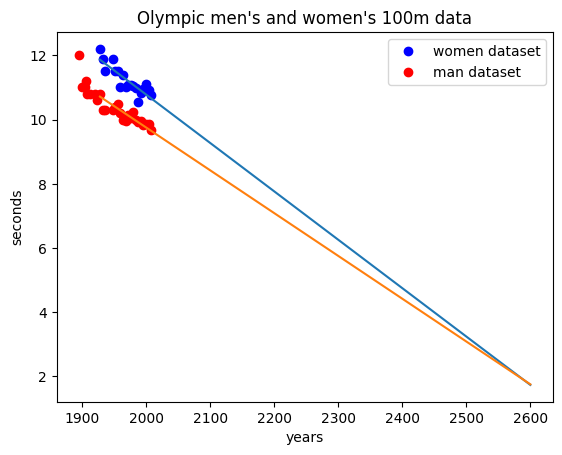

In [ ]:
plt.plot(xn_W,tn_W,'bo',label="women dataset")
plt.plot([1928,2600],[w0_W + w1_W*1928,w0_W + w1_W*2600])
plt.plot(xn_M,tn_M,'ro',label="man dataset")
plt.plot([1928,2600],[w0_M + w1_M*1928,w0_M + w1_M*2600])
plt.title("Olympic men's and women's 100m data")
plt.xlabel("years")
plt.ylabel("seconds")
plt.legend(loc="upper right")
plt.show()

#Exercise 04:
A set of functions might be :

h1(x) = 1

h2(x) = x

h3(x) = sin((x−a)/b)

Assuming a = 2660 and b = 4.3.
Write a program that, using women and men data,
1. Compute the weight’s vector w.


In [ ]:
def find_X(xn):
    x = np.array(xn)
    a = 2660
    b = 4.3
    X = np.array([np.ones(len(x)),x,np.sin((x-a)/b)]).T
    return X

def find_w(xn, tn):
    xn = np.array(xn)
    tn = np.array(tn)
    X = find_X(xn)
    #fit the model
    # Calculate w =(Xt.X)-1 Xt t
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),tn)
    return w

#Compute the weights vector w for Mens 100m data
X_M = find_X(xn_M)
w_M = find_w(xn_M,tn_M)
print("weights vector w for Mens = ",w_M)
#Compute the weights vector w for Womens 100m data
X_W = find_X(xn_W)
w_W = find_w(xn_W,tn_W)
print("weights vector w for Womens = ",w_W)

weights vector w for Mens =  [ 3.66101374e+01 -1.34356490e-02 -1.32947152e-01]
weights vector w for Womens =  [ 4.21112200e+01 -1.56801167e-02 -1.71489931e-01]


2. Compute the loss L.


In [ ]:
def loss (w,X,t):
    return np.dot((t-np.dot(X,w)).T,(t-np.dot(X,w)))

#Compute the loss for Mens 100m data
loss_M = loss(w_M,X_M,tn_M)
print("loss for Mens 100m data is : {}".format(loss_M))
#Compute the loss for Womens 100m data
loss_W = loss(w_W,X_W,tn_W)
print("loss for Womens 100m data is : {}".format(loss_W))

loss for Mens 100m data is : 1.1037193250525363
loss for Womens 100m data is : 0.6296186356844676


3. plot the data set point along-with their corresponding model.

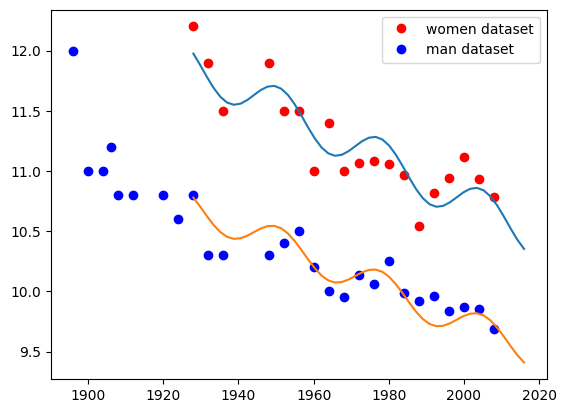

In [ ]:
plt.plot(xn_W,tn_W,'ro',label="women dataset")
plt.plot(xn_M,tn_M,"bo",label="man dataset")
xplot = np.linspace(1928,2016,50)
plt.plot(xplot,w_W[0]+w_W[1]*xplot+w_W[2]*np.sin((xplot-2660)/4.3))
plt.plot(xplot,w_M[0]+w_M[1]*xplot+w_M[2]*np.sin((xplot-2660)/4.3))
plt.legend(loc="upper right")
plt.show()

#Exercise 05

This function, handle polynomial regression for a given degree n. It scales the input data, calculates the polynomial features, fits the model, computes loss, predicts for a specific year "2012", and plots the data with the polynomial curve.

In [ ]:
def Order_n(xn, tn, n):
    xn = np.array(xn)
    tn = np.array(tn)
    #rescaling
    x0 = xn[0]
    xn = (xn - x0)/4
    X = [np.ones(len(xn))]
    for i in range(1,n+1):
        X.append(xn**i)
    X = np.array(X).transpose()
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),tn)
    #Compute the loss
    lossOrder = loss(w,X,tn)
    print("the average loss for mens 100m data in Order {} is : {}".format(n,lossOrder/len(xn)))
    #prediction 2012
    prediction = 0
    for i in range(n+1):
        prediction = prediction + w[i]*((2012-x0)/4)**i

    print("the predicted winning time Order {} for 2012 is : {}".format(i,prediction))
    #plot
    plt.plot(xn,tn,'ro',label = "men dataset")
    xplot = np.linspace(min(xn),max(xn),50)
    yplot = 0
    for i in range(n+1):
        yplot = yplot + w[i]*xplot**i
    titleOrder = ""
    if (n==1):
        titleOrder = "1st order degree"
    else:
        titleOrder = f"{n}th order degree"
    plt.plot(xplot,yplot,label = titleOrder)
    plt.title(titleOrder)
    plt.xlabel("years")
    plt.ylabel("seconds")
    plt.legend(loc="upper right")
    plt.show()
    return lossOrder

applied to the Olympic men's 100m data :

1.   plot polynomial regression models of varying degrees (from 1 to 8)
2.   plot loss of all polynomial regression models







the average loss for mens 100m data in Order 1 is : 0.05030711047565784
the predicted winning time Order 1 for 2012 is : 9.594713852050184


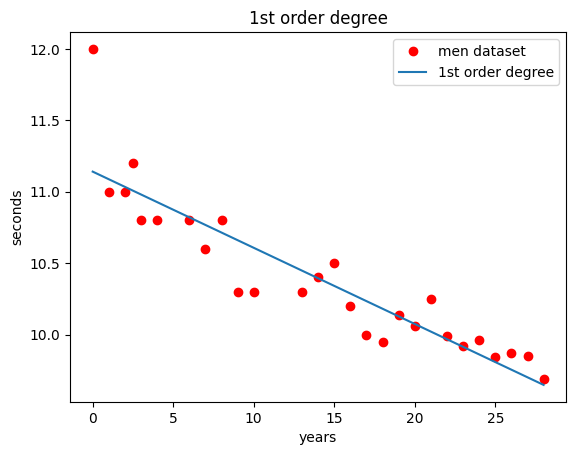

the average loss for mens 100m data in Order 2 is : 0.037958546634719766
the predicted winning time Order 2 for 2012 is : 9.868303142517137


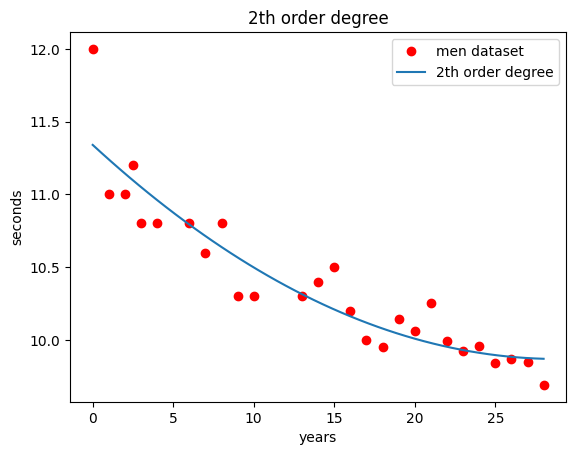

the average loss for mens 100m data in Order 3 is : 0.02961132122019674
the predicted winning time Order 3 for 2012 is : 9.582932145222015


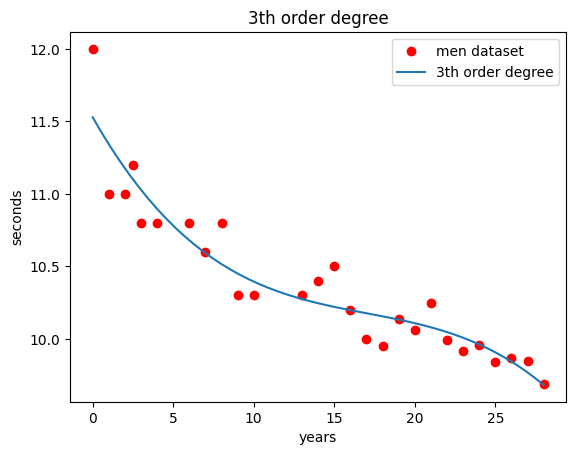

the average loss for mens 100m data in Order 4 is : 0.027060311454978586
the predicted winning time Order 4 for 2012 is : 9.794446130417008


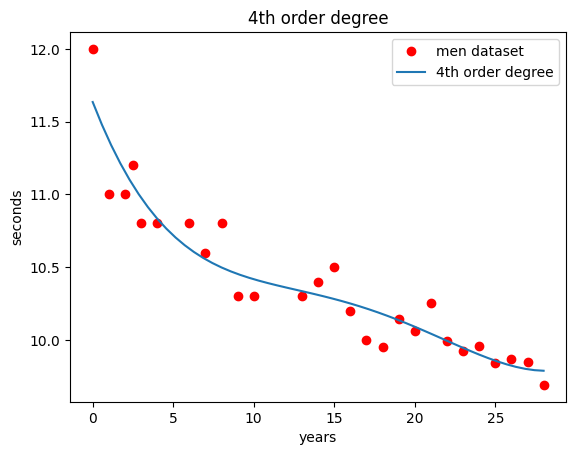

the average loss for mens 100m data in Order 5 is : 0.02349551035601463
the predicted winning time Order 5 for 2012 is : 9.480646165901739


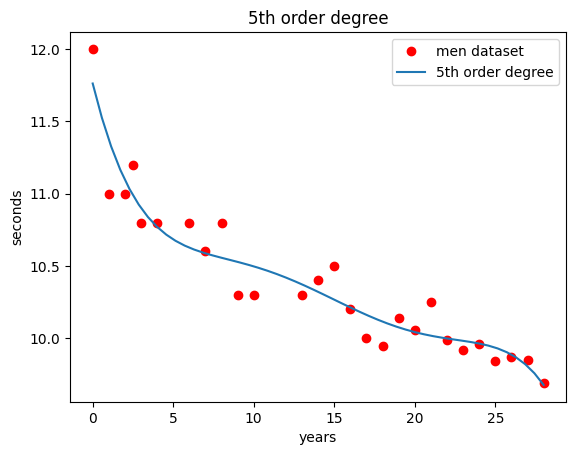

the average loss for mens 100m data in Order 6 is : 0.022016386821807624
the predicted winning time Order 6 for 2012 is : 9.766096079432288


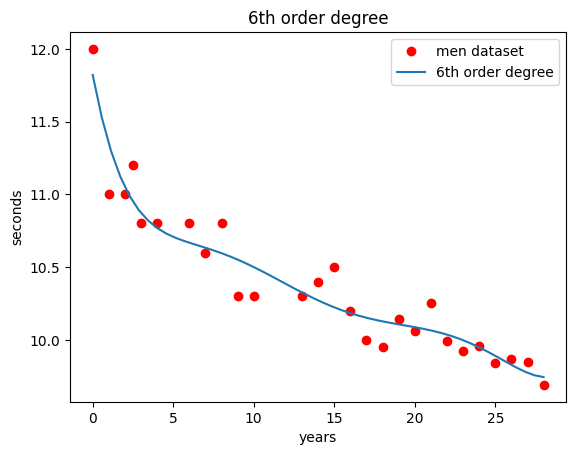

the average loss for mens 100m data in Order 7 is : 0.019702632791319036
the predicted winning time Order 7 for 2012 is : 9.277348589799885


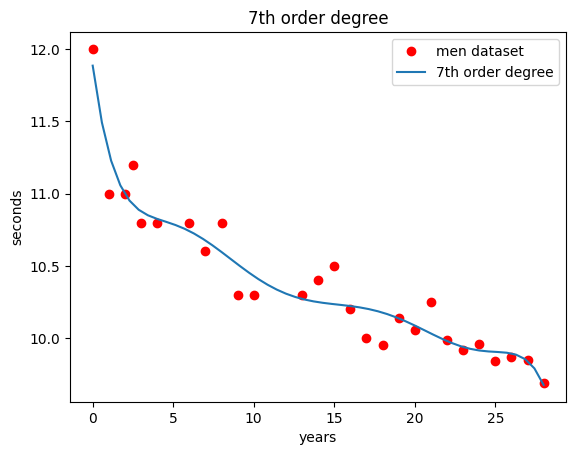

the average loss for mens 100m data in Order 8 is : 0.01698138787365043
the predicted winning time Order 8 for 2012 is : 10.010056733494821


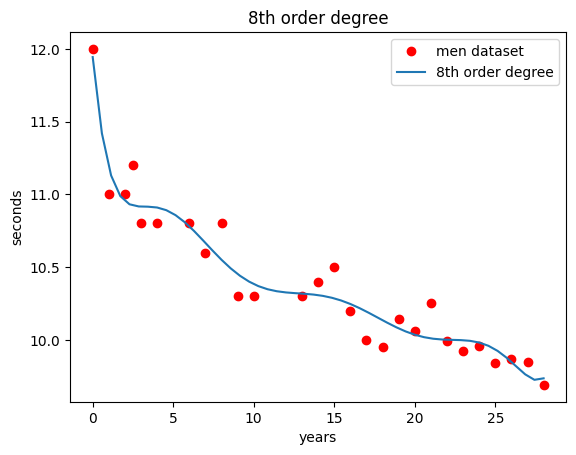

loss for the Olympic men's 100m


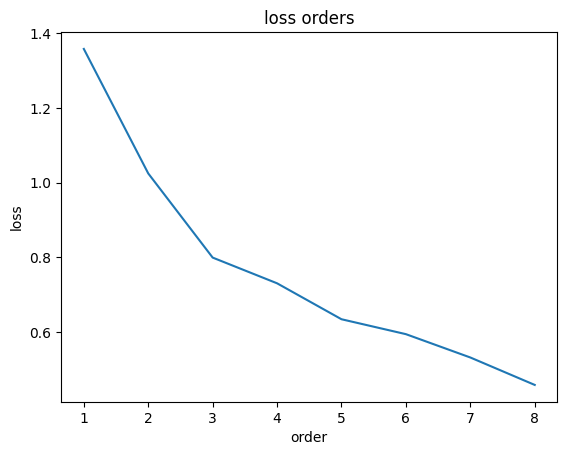

In [ ]:
losses = []
for i in range(8):
    lossOrder=Order_n(xn_M,tn_M,i+1)
    losses.append(lossOrder)
print("loss for the Olympic men's 100m")
plt.plot([1,2,3,4,5,6,7,8],losses)
plt.title("loss orders")
plt.xlabel("order")
plt.ylabel("loss")
plt.show()

#Exercise 06
cross validation for the mens 100m data set "oder 1"

the loss with validation data set is : 0.7492736336784179
the average loss with validation data set is : 0.09365920420980224


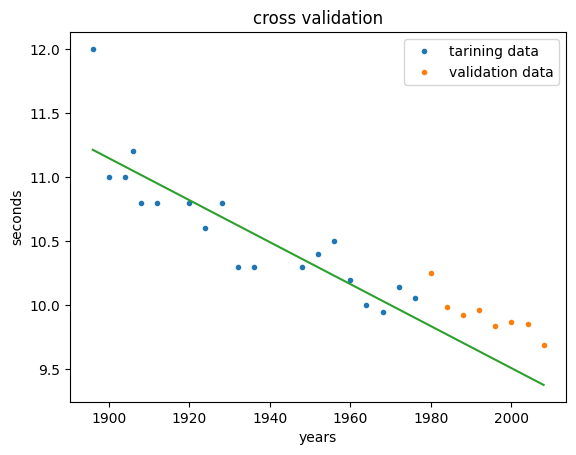

In [ ]:
xn_M_training = xn_M[0:19]
xn_M_validation = xn_M[19:]
tn_M_training = tn_M[0:19]
tn_M_validation = tn_M[19:]
#compute the weights vector w for the training data set
w_M_training = find_w(xn_M_training,tn_M_training)
#compute the loss with validation data set
loss_M_validation = loss(w_M_training,find_X(xn_M_validation),tn_M_validation)
print("the loss with validation data set is : {}".format(loss_M_validation))
#compute the average loss with validation data set
loss_average = loss_M_validation/len(xn_M_validation)
print("the average loss with validation data set is : {}".format(loss_average))
#plot
plt.plot(xn_M_training,tn_M_training,'.',label = "tarining data")
plt.plot(xn_M_validation,tn_M_validation,'.',label = "validation data")
xplot = np.linspace(1896,2008,50)
plt.plot(xplot,w_M_training[0]+w_M_training[1]*xplot)
plt.title("cross validation")
plt.xlabel("years")
plt.ylabel("seconds")
plt.legend(loc="upper right")
plt.show()

#Exercise 07
cross validation k-fold for the mens 100m data set "oder 1"

In [ ]:
#data set
xnMen = [1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008]
tnMen = [12.00, 11.00, 11.00, 11.20, 10.80, 10.80, 10.80, 10.60, 10.80, 10.30, 10.30, 10.30, 10.40, 10.50, 10.20, 10.00, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85,9.69]

#split data set
k=5
xn_Kfold = np.array(xnMen)
tn_Kfold = np.array(tnMen)
xn_Kfold = np.array_split(xn_Kfold, k)
tn_Kfold = np.array_split(tn_Kfold, k)
